## Problem Statement
Write a Python 3 script structures.py which has:
1.	Function monolayer(S, d) which returns (x, y, z) tuple of coordinates of monolayer, such that the layer of particles is a 2D triangular lattice of size SxS with points spaced by d.
2.	Function filaments(S, d, r) which returns (x, y, z) tuple of coordinates of particles on filaments, such that the filaments seem to have grown (like roots) from a 2D triangular lattice of size SxS with filaments spaced by d and particles spaced by r along the filaments.
3.	Matplotlib-based code that uses above functions to generate the initial configuration approximately as shown:

<img src="Screenshot 2023-12-23.png" alt="Initial Configuration of Particles/Biomolecules" />

Initial Configuration of Particles/Biomolecules

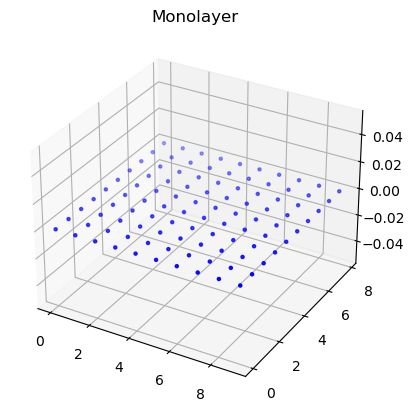

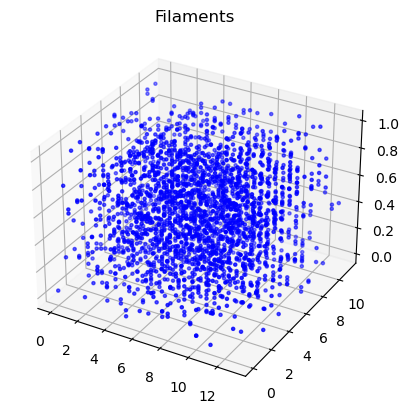

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def monolayer(S, d):
    coordinates = []
    for i in range(S):
        for j in range(S):
            x = i * d
            y = j * d * np.sqrt(3) / 2
            z = 0
            coordinates.append((x, y, z))
    return coordinates

def filaments(S, d, r):
    coordinates = []
    for i in range(S):
        for j in range(S):
            x_base = i * d
            y_base = j * d * np.sqrt(3) / 2
            z_base = 0
            for k in range(r):
                for l in range(r):
                    x = x_base + k * d
                    y = y_base + l * d * np.sqrt(3) / 2
                    z = z_base + np.random.uniform(0, 1)
                    coordinates.append((x, y, z))
    return coordinates

def plot_coordinates(coordinates, title):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(*zip(*coordinates), s=5, c='b', marker='o')
    ax.set_title(title)
    plt.show()


S = 10
d = 1.0
r = 5

monolayer_coordinates = monolayer(S, d)
filaments_coordinates = filaments(S, d, r)

plot_coordinates(monolayer_coordinates, 'Monolayer')
plot_coordinates(filaments_coordinates, 'Filaments')

### Reviewer Comments

1. It is best practice to have a commented header in code indicating a short Description, Date of version, Version number, Usage Shell command and Software Version in which the script was developed/deployed.

Authorship (e.g. # Copyright [Year of writing/contributing code] [Contributor Name]) is optional but encouraged.

Here's an example if 3 people contributed to version 0.2.0 updated on 09-Jan-2024:

```python
# This file prints Hello World.
# 
# Copyright 2024 Contributor Name
# Copyright 2024 Contributor Name
# Copyright 2024 Contributor Name
# 
# date         :09-Jan-2024
# version      :0.2.0
# usage        :python hello.py
# py_version   :3.9.18

print('Hello World!')
```

2. Whenever we plot an object in 3D, we should also visualize the 3D bounding box. This helps verify that particle coordinates leaking from the boundaries do not come back on top of or too close to other particles in 'periodic boundary condition'.

3. The present monolayer has square close packing (SCP). It is better to initialize particle coordinates in hexagonal closed packing (HCP) due to physics of intermolecular forces in fluid membranes. The np.sqrt(3) / 2 in y-coordinate is doesn't create HCP structure.

4. I am skipping commenting on filament for now as we shall first test the monolayer code in simulations.

### Next steps regarding each comment:

1. Please add a header to the code.

2. Suggesting we add a black-lined bounding box similar to how they added a yellow-lined one at https://docs.lammps.org/_images/pylammps_dihedral.jpg.

3. Please modify the monolayer function to generate HCP coordinates like this:

<img src="pylammps_mc_minimum.jpg" alt="HCP coordinates" />

4. No action needed on filament code yet.

### Reverse engineering nm.py from ne.py:

To test the monolayer code in simulations, we would like to create a `nm.py` file from `ne.py` file at `assembly/gen/ne_make/`.

In the `structures.py` code, monolayer particle coordinates are being visualized, but not written to a file that LAMMPS can read. In fact, from the 4 sections in `ne.py` (Initialize, Functions, Molecules and Write), we only have made progress on the Functions section. Let us discuss the other sections in the next meeting.

Resource: https://github.com/pranjal-s/CGNES/blob/master/assembly/gen/ne_make/ne.py

### Closing remarks:

This membrane directory with simulation of just the monolayer was lacking in CGNES for tutorial purpose to newcomers. It is good that we are working on this crucial gap of membrane-only simulation in code documentation.

Regards,

Pranjal Singh